In [1]:
# generally required libraries
from skmultiflow.data import SEAGenerator
import pandas as pd
import numpy as np

## Generating data

### SEA without noise

In [2]:
generator = SEAGenerator(random_state=100)
X, y = generator.next_sample(10000)
print(X.shape, y.shape) # this shows that X is a 10000 by 3 matrix and y a one dimensional array

(10000, 3) (10000,)


In [3]:
# we transform y into a numpy array, transpose it, cimbine it with X and transform the whole into a dataframe
df = pd.DataFrame(np.hstack((X,np.array([y]).T)))
df = df.astype({3:int}) # this converts the last column which is comprised of ones and zeros into integer values
df

,0,1,2,3
0,5.434049,2.783694,4.245176,1
1,0.047189,1.215691,6.707491,0
2,1.367066,5.750933,8.913220,0
3,1.853282,1.083769,2.196975,0
4,8.116831,1.719410,8.162247,1
...,...,...,...,...
9995,6.866050,3.723009,6.374975,1
9996,0.310384,4.204737,6.196646,0
9997,5.962235,9.280850,3.853130,1
9998,3.162848,8.371640,7.288275,1


In [4]:
# write the above dataframe to file without the header and row index
df.to_csv("SEA Dataset.csv", index=False, header=False)

### SEA with 10% noise

In [5]:
# the same as the previous one, only with 10% noise introduced into the data
generator = SEAGenerator(random_state=100, noise_percentage=0.1)
X, y = generator.next_sample(10000)
print(X.shape, y.shape)

(10000, 3) (10000,)


In [6]:
df = pd.DataFrame(np.hstack((X,np.array([y]).T)))
df = df.astype({3:int})
df

,0,1,2,3
0,5.434049,2.783694,4.245176,1
1,0.047189,1.215691,6.707491,0
2,1.367066,5.750933,8.913220,0
3,1.853282,1.083769,2.196975,0
4,8.116831,1.719410,8.162247,1
...,...,...,...,...
9995,6.866050,3.723009,6.374975,0
9996,0.310384,4.204737,6.196646,0
9997,5.962235,9.280850,3.853130,1
9998,3.162848,8.371640,7.288275,1


In [7]:
df.to_csv("SEA Dataset 10.csv", index=False, header=False)

### SEA with 70% noise

In [8]:
# # the same as the previous one, only with 70% noise introduced into the data
generator = SEAGenerator(random_state=100, noise_percentage=0.7)
X, y = generator.next_sample(10000)
print(X.shape, y.shape)

(10000, 3) (10000,)


In [9]:
df = pd.DataFrame(np.hstack((X,np.array([y]).T)))
df = df.astype({3:int})
df

,0,1,2,3
0,5.434049,2.783694,4.245176,1
1,0.047189,1.215691,6.707491,0
2,1.367066,5.750933,8.913220,1
3,1.853282,1.083769,2.196975,0
4,8.116831,1.719410,8.162247,0
...,...,...,...,...
9995,6.866050,3.723009,6.374975,0
9996,0.310384,4.204737,6.196646,1
9997,5.962235,9.280850,3.853130,1
9998,3.162848,8.371640,7.288275,0


In [10]:
df.to_csv("SEA Dataset 70.csv", index=False, header=False)

## Training and Evaluation

In [224]:
# for showing plots nicely
%matplotlib inline 
%load_ext memory_profiler
# to convert a file into a stream
from skmultiflow.data import FileStream 
from skmultiflow.trees import HoeffdingTreeClassifier

## HT

### HT no noise

In [230]:
%%memit
stream = FileStream("./SEA Dataset.csv") # read the file as a stream
ht = HoeffdingTreeClassifier() # initialize the Hoeffding Tree Classifier

n_samples = 0 # to keep track of the number of samples processed
corrects = 0 # to keep track of the number of correct predictions the classifier has made
df_HTNoNoise = pd.DataFrame(columns=['accuracy']) # to keep track of evolution of the prediction accuracy

start_with = 1 # number of samples to train before interleaved_test_then_train procedure (a hot start can be done by setting this value to e.g. 200)
X, y = stream.next_sample(start_with) # get samples from the stream
ht = ht.partial_fit(X, y, classes=[0,1]) # here we first train our model on a set of #start_with samples (here it is 1)
prepred = ht.predict(X) # a 1D array of predicted values. the length is equal to start_with
n_samples += start_with # this should be equal to start_with because we have already used #start_with samples
corrects = (prepred == y).sum() # how many of the first #start_with samples were predicted correctly

# this is the interleaved_test_then_train procedure
while stream.has_more_samples():
    X, y = stream.next_sample() # first get one sample from the stream
    pred = ht.predict(X) # predict its class
    if y[0] == pred[0]: # if the prediction is correct add one to #corrects
        corrects += 1
    ht = ht.partial_fit(X, y) # train the model on the current sample
    n_samples += 1 # add one to the number of samples processed so far
    # after each sample, add the accuracy of the model so far (as the ratio of 
    # the number of correct predictions so far to the number of sammples processed so far) to a dataframe.
    df_HTNoNoise = df_HTNoNoise.append(pd.DataFrame(np.array([[corrects/n_samples]]), columns=['accuracy']), ignore_index=True) 

print("Accuracy: {}".format(corrects/n_samples)) # the overall accuracy of the model after the training is finished

Accuracy: 0.9603960396039604
peak memory: 333.12 MiB, increment: 0.00 MiB


### HT 10% noise

In [232]:
%%memit
stream = FileStream("./SEA Dataset 10.csv")
ht = HoeffdingTreeClassifier()
n_samples = 0
corrects = 0
df_HT10Noise = pd.DataFrame(columns=['accuracy'])

start_with = 1
X, y = stream.next_sample(start_with)
ht = ht.partial_fit(X, y, classes=[0,1])
prepred = ht.predict(X)
n_samples += start_with
corrects = (prepred == y).sum()

while stream.has_more_samples():
    X, y = stream.next_sample()
    pred = ht.predict(X)
    if y[0] == pred[0]:
        corrects += 1
    ht = ht.partial_fit(X, y)
    n_samples += 1
    df_HT10Noise = df_HT10Noise.append(pd.DataFrame(np.array([[corrects/n_samples]]), columns=['accuracy']), ignore_index=True)
print("Accuracy: {}".format(corrects/n_samples))

Accuracy: 0.8683868386838683
peak memory: 333.12 MiB, increment: 0.00 MiB


### HT 70% noise

In [234]:
%%memit
stream = FileStream("./SEA Dataset 70.csv")
ht = HoeffdingTreeClassifier()
n_samples = 0
corrects = 0
df_HT70Noise = pd.DataFrame(columns=['accuracy'])

start_with = 1
X, y = stream.next_sample(start_with)
ht = ht.partial_fit(X, y, classes=[0,1])
prepred = ht.predict(X)
n_samples += start_with
corrects = (prepred == y).sum()

while stream.has_more_samples():
    X, y = stream.next_sample()
    pred = ht.predict(X)
    if y[0] == pred[0]:
        corrects += 1
    ht = ht.partial_fit(X, y)
    n_samples += 1
    df_HT70Noise = df_HT70Noise.append(pd.DataFrame(np.array([[corrects/n_samples]]), columns=['accuracy']), ignore_index=True)
print("Accuracy: {}".format(corrects/n_samples))

Accuracy: 0.6646664666466646
peak memory: 333.13 MiB, increment: 0.00 MiB


## KNN

### KNN no noise

In [101]:
from skmultiflow.lazy import KNNClassifier

In [236]:
%%memit
stream = FileStream("./SEA Dataset.csv")
knn = KNNClassifier()
n_samples = 0
corrects = 0
df_KNNNoNoise = pd.DataFrame(columns=['accuracy'])

start_with = 1
X, y = stream.next_sample(start_with)
knn = knn.partial_fit(X, y, classes=[0,1]) 
prepred = knn.predict(X)
n_samples += start_with
corrects = (prepred == y).sum()

while stream.has_more_samples():
    X, y = stream.next_sample()
    pred = knn.predict(X)
    if y[0] == pred[0]:
        corrects += 1
    knn = knn.partial_fit(X, y)
    n_samples += 1
    df_KNNNoNoise = df_KNNNoNoise.append(pd.DataFrame(np.array([[corrects/n_samples]]), columns=['accuracy']), ignore_index=True)
print("Accuracy: {}".format(corrects/n_samples))

Accuracy: 0.9704970497049705
peak memory: 333.14 MiB, increment: 0.00 MiB


### KNN 10% noise

In [238]:
%%memit
stream = FileStream("./SEA Dataset 10.csv")
knn = KNNClassifier()
n_samples = 0
corrects = 0
df_KNN10Noise = pd.DataFrame(columns=['accuracy'])

start_with = 1
X, y = stream.next_sample(start_with)
knn = knn.partial_fit(X, y, classes=[0,1])
prepred = knn.predict(X)
n_samples += start_with
corrects = (prepred == y).sum()

while stream.has_more_samples():
    X, y = stream.next_sample()
    pred = knn.predict(X)
    if y[0] == pred[0]:
        corrects += 1
    knn = knn.partial_fit(X, y)
    n_samples += 1
    df_KNN10Noise = df_KNN10Noise.append(pd.DataFrame(np.array([[corrects/n_samples]]), columns=['accuracy']), ignore_index=True)
print("Accuracy: {}".format(corrects/n_samples))

Accuracy: 0.8741874187418742
peak memory: 333.14 MiB, increment: 0.00 MiB


### KNN 70% noise

In [240]:
%%memit
stream = FileStream("./SEA Dataset 70.csv")
knn = KNNClassifier()
n_samples = 0
corrects = 0
df_KNN70Noise = pd.DataFrame(columns=['accuracy'])

start_with = 1
X, y = stream.next_sample(start_with)
knn = knn.partial_fit(X, y, classes=[0,1])
prepred = knn.predict(X)
n_samples += start_with
corrects = (prepred == y).sum()

while stream.has_more_samples():
    X, y = stream.next_sample()
    pred = knn.predict(X)
    if y[0] == pred[0]:
        corrects += 1
    knn = knn.partial_fit(X, y)
    n_samples += 1
    df_KNN70Noise = df_KNN70Noise.append(pd.DataFrame(np.array([[corrects/n_samples]]), columns=['accuracy']), ignore_index=True)
print("Accuracy: {}".format(corrects/n_samples))

Accuracy: 0.6192619261926192
peak memory: 333.15 MiB, increment: 0.00 MiB


# MLP

### MLP no noise

In [4]:
from sklearn.neural_network import MLPClassifier

In [242]:
%%memit
stream = FileStream("./SEA Dataset.csv")
mlp = MLPClassifier (hidden_layer_sizes = (50, 50, 50, 50))
n_samples = 0
corrects = 0
df_MLPNoNoise = pd.DataFrame(columns=['accuracy'])

start_with = 1
X, y = stream.next_sample(start_with)
mlp = mlp.partial_fit(X, y, classes=[0,1]) # MLPClassifier especially requires to be given the classes in the first run
prepred = mlp.predict(X)
n_samples += start_with
corrects = (prepred == y).sum()

while stream.has_more_samples():
    X, y = stream.next_sample()
    pred = mlp.predict(X)
    if y[0] == pred[0]:
        corrects += 1
    mlp = mlp.partial_fit(X, y)
    n_samples += 1
    df_MLPNoNoise = df_MLPNoNoise.append(pd.DataFrame(np.array([[corrects/n_samples]]), columns=['accuracy']), ignore_index=True)
print("Accuracy: {}".format(corrects/n_samples))

Accuracy: 0.9518951895189519
peak memory: 330.88 MiB, increment: 1.51 MiB


### MLP 10% noise

In [244]:
%%memit
stream = FileStream("./SEA Dataset 10.csv")
mlp = MLPClassifier (hidden_layer_sizes = (50, 50, 50, 50))
n_samples = 0
corrects = 0
df_MLP10Noise = pd.DataFrame(columns=['accuracy'])

start_with = 1
X, y = stream.next_sample(start_with)
mlp = mlp.partial_fit(X, y, classes=[0,1])
prepred = mlp.predict(X)
n_samples += start_with
corrects = (prepred == y).sum()

while stream.has_more_samples():
    X, y = stream.next_sample()
    pred = mlp.predict(X)
    if y[0] == pred[0]:
        corrects += 1
    mlp = mlp.partial_fit(X, y)
    n_samples += 1
    df_MLP10Noise = df_MLP10Noise.append(pd.DataFrame(np.array([[corrects/n_samples]]), columns=['accuracy']), ignore_index=True)
print("Accuracy: {}".format(corrects/n_samples))

Accuracy: 0.8588858885888588
peak memory: 330.07 MiB, increment: 1.24 MiB


### MLP 70% noise

In [268]:
%%memit
stream = FileStream("./SEA Dataset 70.csv")
mlp = MLPClassifier (hidden_layer_sizes = (50, 50, 50, 50))
n_samples = 0
corrects = 0
df_MLP70Noise = pd.DataFrame(columns=['accuracy'])

start_with = 1
X, y = stream.next_sample(start_with)
mlp = mlp.partial_fit(X, y, classes=[0,1])
prepred = mlp.predict(X)
n_samples += start_with
corrects = (prepred == y).sum()

while stream.has_more_samples():
    X, y = stream.next_sample()
    pred = mlp.predict(X)
    if y[0] == pred[0]:
        corrects += 1
    mlp = mlp.partial_fit(X, y)
    n_samples += 1
    df_MLP70Noise = df_MLP70Noise.append(pd.DataFrame(np.array([[corrects/n_samples]]), columns=['accuracy']), ignore_index=True)
print("Accuracy: {}".format(corrects/n_samples))

Accuracy: 0.6448644864486449
peak memory: 333.38 MiB, increment: 1.08 MiB


# MV voting based on class label

### MV no noise

In [108]:
# we define a class for MV and WMV.
# the voting is based on class labels and not on class probabilities (this can easily be done we some additional code)
class MajorityVotingRuleClassifier:
    # the constructer needs an array of classifier objects and an optinal array of weights.
    # if weights are not provided, then it is an MV
    # if weights are provided and they are not the same, then it is an WMV
    def __init__(self, classifiers, weights=None): 
        self.classifiers = classifiers
        self.weights = weights
    # this calls the partial_fit function of all the input classifiers
    # if classes are provided, they we be pass on to each classifier
    def partial_fit(self, X, y, classes=None):
        for i in range(len(self.classifiers)):
            self.classifiers[i] = self.classifiers[i].partial_fit(X=X, y=y, classes=classes)
        return self
    # breaking down the below code:
    ## map(lambda a: a.predict(X), self.classifiers) -> call the predict function of each classifier on X and store the results in a map object
    ## list(map(lambda a: a.predict(X), self.classifiers)) -> we need a list object not a map object
    ## zip(*list(map(lambda a: a.predict(X), self.classifiers))) -> we zip these lists together
    ## then we take each row of the zipped lists and feed it to np.argmax(np.bincount(...))
    ## which basically returns 0 or 1 based on votes and weights
    def predict(self, X):
        #return [np.argmax(np.bincount(d, weights=self.weights)) for d in zip([clf.predict(X) for clf in self.classifiers])]
        return [np.argmax(np.bincount(d, weights=self.weights)) for d in zip(*list(map(lambda a: a.predict(X), self.classifiers)))]


In [248]:
%%memit
stream = FileStream("./SEA Dataset.csv")
ht = HoeffdingTreeClassifier()
knn = KNNClassifier()
mlp = MLPClassifier (hidden_layer_sizes = (50, 50, 50, 50))
# create an instance of our ensemble classifier with three individual classifiers.
# because there no weights are provided, it is an MV classifier.
mvc = MajorityVotingRuleClassifier([ht,knn,mlp]) 

n_samples = 0
corrects = 0
df_MVNoNoise = pd.DataFrame(columns=['accuracy'])

start_with = 1
X, y = stream.next_sample(start_with)
mvc = mvc.partial_fit(X, y, classes=[0,1])
prepred = mvc.predict(X)
n_samples += start_with
corrects = (prepred == y).sum()

while stream.has_more_samples():
    X, y = stream.next_sample()
    pred = mvc.predict(X)
    if y[0] == pred[0]:
        corrects += 1
    mvc = mvc.partial_fit(X, y)
    n_samples += 1
    df_MVNoNoise = df_MVNoNoise.append(pd.DataFrame(np.array([[corrects/n_samples]]), columns=['accuracy']), ignore_index=True)

print("Accuracy: {}".format(corrects/n_samples))

Accuracy: 0.9734973497349735
peak memory: 333.73 MiB, increment: 0.00 MiB


### MV 10% noise

In [250]:
%%memit
stream = FileStream("./SEA Dataset 10.csv")
ht = HoeffdingTreeClassifier()
knn = KNNClassifier()
mlp = MLPClassifier (hidden_layer_sizes = (50, 50, 50, 50))
mvc = MajorityVotingRuleClassifier([ht,knn,mlp])

n_samples = 0
corrects = 0
df_MV10Noise = pd.DataFrame(columns=['accuracy'])

start_with = 1
X, y = stream.next_sample(start_with)
mvc = mvc.partial_fit(X, y, classes=[0,1])
prepred = mvc.predict(X)
n_samples += start_with
corrects = (prepred == y).sum()

while stream.has_more_samples():
    X, y = stream.next_sample()
    pred = mvc.predict(X)
    if y[0] == pred[0]:
        corrects += 1
    mvc = mvc.partial_fit(X, y)
    n_samples += 1
    df_MV10Noise = df_MV10Noise.append(pd.DataFrame(np.array([[corrects/n_samples]]), columns=['accuracy']), ignore_index=True)
print("Accuracy: {}".format(corrects/n_samples))

Accuracy: 0.8806880688068807
peak memory: 330.72 MiB, increment: 1.48 MiB


### MV 70% noise

In [252]:
%%memit
stream = FileStream("./SEA Dataset 70.csv")
ht = HoeffdingTreeClassifier()
knn = KNNClassifier()
mlp = MLPClassifier (hidden_layer_sizes = (50, 50, 50, 50))
mvc = MajorityVotingRuleClassifier([ht,knn,mlp])

n_samples = 0
corrects = 0
df_MV70Noise = pd.DataFrame(columns=['accuracy'])

start_with = 1
X, y = stream.next_sample(start_with)
mvc = mvc.partial_fit(X, y, classes=[0,1])
prepred = mvc.predict(X)
n_samples += start_with
corrects = (prepred == y).sum()

while stream.has_more_samples():
    X, y = stream.next_sample()
    pred = mvc.predict(X)
    if y[0] == pred[0]:
        corrects += 1
    mvc = mvc.partial_fit(X, y)
    n_samples += 1
    df_MV70Noise = df_MV70Noise.append(pd.DataFrame(np.array([[corrects/n_samples]]), columns=['accuracy']), ignore_index=True)
print("Accuracy: {}".format(corrects/n_samples))

Accuracy: 0.664966496649665
peak memory: 330.94 MiB, increment: 0.04 MiB


# WMV based on class label

### WMV no noise

In [113]:
overview = pd.DataFrame(columns=('w1', 'w2', 'w3', 'accuracy'))
o = 0 # index of rows for overview
# here we are searching for best combination of weights between 1 and 4.
# this of course can also be done in a much larger range, but it would take longer
for w1 in range(1,4): 
    for w2 in range(1,4):
        for w3 in range(1,4):
            if len(set((w1,w2,w3))) == 1: # skip if all weights are equal
                continue
            stream = FileStream("./SEA Dataset.csv")
            ht = HoeffdingTreeClassifier()
            knn = KNNClassifier()
            mlp = MLPClassifier (hidden_layer_sizes = (50, 50, 50, 50))
            mvc = MajorityVotingRuleClassifier([ht,knn,mlp])

            n_samples = 0
            corrects = 0
            
            start_with = 1
            X, y = stream.next_sample(start_with)
            mvc = mvc.partial_fit(X, y, classes=[0,1])
            prepred = mvc.predict(X)
            n_samples += start_with
            corrects = (prepred == y).sum()

            while stream.has_more_samples():
                X, y = stream.next_sample()
                pred = mvc.predict(X)
                if y[0] == pred[0]:
                    corrects += 1
                mvc = mvc.partial_fit(X, y)
                n_samples += 1
                
            overview.loc[o] = [w1,w2,w3,corrects/n_samples]
            o += 1
print(overview.sort_values(by=['accuracy'])) # the last row of the dataframe after sorting is the best choice for weights

     w1   w2   w3  accuracy
2   1.0  2.0  1.0  0.972297
11  2.0  2.0  1.0  0.972397
23  3.0  3.0  2.0  0.972497
16  3.0  1.0  1.0  0.972597
5   1.0  3.0  1.0  0.972797
0   1.0  1.0  2.0  0.972897
14  2.0  3.0  2.0  0.972897
22  3.0  3.0  1.0  0.972997
13  2.0  3.0  1.0  0.972997
9   2.0  1.0  2.0  0.973097
20  3.0  2.0  2.0  0.973097
3   1.0  2.0  2.0  0.973097
1   1.0  1.0  3.0  0.973197
15  2.0  3.0  3.0  0.973197
19  3.0  2.0  1.0  0.973197
8   2.0  1.0  1.0  0.973197
21  3.0  2.0  3.0  0.973297
18  3.0  1.0  3.0  0.973497
17  3.0  1.0  2.0  0.973597
7   1.0  3.0  3.0  0.973797
12  2.0  2.0  3.0  0.973897
4   1.0  2.0  3.0  0.973997
6   1.0  3.0  2.0  0.974297
10  2.0  1.0  3.0  0.974497


In [254]:
%%memit
# WMV with weights w1=2 , w2=1 , w3=3
stream = FileStream("./SEA Dataset.csv")
ht = HoeffdingTreeClassifier()
knn = KNNClassifier()
mlp = MLPClassifier (hidden_layer_sizes = (50, 50, 50, 50))
mvc = MajorityVotingRuleClassifier([ht,knn,mlp], weights=[2,1,3])

n_samples = 0
corrects = 0
df_WMVNoNoise = pd.DataFrame(columns=['accuracy'])

start_with = 1
X, y = stream.next_sample(start_with)
mvc = mvc.partial_fit(X, y, classes=[0,1])
prepred = mvc.predict(X)
n_samples += start_with
corrects = (prepred == y).sum()

while stream.has_more_samples():
    X, y = stream.next_sample()
    pred = mvc.predict(X)
    if y[0] == pred[0]:
        corrects += 1
    mvc = mvc.partial_fit(X, y)
    n_samples += 1
    df_WMVNoNoise = df_WMVNoNoise.append(pd.DataFrame(np.array([[corrects/n_samples]]), columns=['accuracy']), ignore_index=True)
print("Accuracy: {}".format(corrects/n_samples))

Accuracy: 0.9654965496549655
peak memory: 331.08 MiB, increment: 1.46 MiB


### WMV 10% noise

In [115]:
overview = pd.DataFrame(columns=('w1', 'w2', 'w3', 'accuracy'))
o = 0
for w1 in range(1,4):
    for w2 in range(1,4):
        for w3 in range(1,4):
            if len(set((w1,w2,w3))) == 1:
                continue
            stream = FileStream("./SEA Dataset 10.csv")
            ht = HoeffdingTreeClassifier()
            knn = KNNClassifier()
            mlp = MLPClassifier (hidden_layer_sizes = (50, 50, 50, 50))
            mvc = MajorityVotingRuleClassifier([ht,knn,mlp])

            n_samples = 0
            corrects = 0

            start_with = 1
            X, y = stream.next_sample(start_with)
            mvc = mvc.partial_fit(X, y, classes=[0,1])
            prepred = mvc.predict(X)
            n_samples += start_with
            corrects = (prepred == y).sum()

            while stream.has_more_samples():
                X, y = stream.next_sample()
                pred = mvc.predict(X)
                if y[0] == pred[0]:
                    corrects += 1
                mvc = mvc.partial_fit(X, y)
                n_samples += 1
            overview.loc[o] = [w1,w2,w3,corrects/n_samples]
            o += 1
print(overview.sort_values(by=['accuracy']))

     w1   w2   w3  accuracy
12  2.0  2.0  3.0  0.879088
8   2.0  1.0  1.0  0.879088
11  2.0  2.0  1.0  0.879388
10  2.0  1.0  3.0  0.879388
17  3.0  1.0  2.0  0.879688
3   1.0  2.0  2.0  0.879788
22  3.0  3.0  1.0  0.879888
19  3.0  2.0  1.0  0.879988
23  3.0  3.0  2.0  0.879988
9   2.0  1.0  2.0  0.880088
2   1.0  2.0  1.0  0.880088
1   1.0  1.0  3.0  0.880388
21  3.0  2.0  3.0  0.880388
13  2.0  3.0  1.0  0.880488
7   1.0  3.0  3.0  0.880488
6   1.0  3.0  2.0  0.880588
0   1.0  1.0  2.0  0.880588
18  3.0  1.0  3.0  0.880788
20  3.0  2.0  2.0  0.880788
16  3.0  1.0  1.0  0.880888
4   1.0  2.0  3.0  0.881188
5   1.0  3.0  1.0  0.881388
15  2.0  3.0  3.0  0.881388
14  2.0  3.0  2.0  0.881588


In [256]:
%%memit
# WMV with weights w1=2 , w2=3 , w3=2
stream = FileStream("./SEA Dataset 10.csv")
ht = HoeffdingTreeClassifier()
knn = KNNClassifier()
mlp = MLPClassifier (hidden_layer_sizes = (50, 50, 50, 50))
mvc = MajorityVotingRuleClassifier([ht,knn,mlp], weights=[2,3,2])

n_samples = 0
corrects = 0
df_WMV10Noise = pd.DataFrame(columns=['accuracy'])

start_with = 1
X, y = stream.next_sample(start_with)
mvc = mvc.partial_fit(X, y, classes=[0,1])
prepred = mvc.predict(X)
n_samples += start_with
corrects = (prepred == y).sum()

while stream.has_more_samples():
    X, y = stream.next_sample()
    pred = mvc.predict(X)
    if y[0] == pred[0]:
        corrects += 1
    mvc = mvc.partial_fit(X, y)
    n_samples += 1
    df_WMV10Noise = df_WMV10Noise.append(pd.DataFrame(np.array([[corrects/n_samples]]), columns=['accuracy']), ignore_index=True)
print("Accuracy: {}".format(corrects/n_samples))

Accuracy: 0.8798879887988799
peak memory: 331.15 MiB, increment: 1.48 MiB


### WMV 70% noise

In [117]:
overview = pd.DataFrame(columns=('w1', 'w2', 'w3', 'accuracy'))
o = 0
for w1 in range(1,4):
    for w2 in range(1,4):
        for w3 in range(1,4):
            if len(set((w1,w2,w3))) == 1: 
                continue
            stream = FileStream("./SEA Dataset 70.csv")
            ht = HoeffdingTreeClassifier()
            knn = KNNClassifier()
            mlp = MLPClassifier (hidden_layer_sizes = (50, 50, 50, 50))
            mvc = MajorityVotingRuleClassifier([ht,knn,mlp])

            n_samples = 0
            corrects = 0

            start_with = 1
            X, y = stream.next_sample(start_with)
            mvc = mvc.partial_fit(X, y, classes=[0,1])
            prepred = mvc.predict(X)
            n_samples += start_with
            corrects = (prepred == y).sum()

            while stream.has_more_samples():
                X, y = stream.next_sample()
                pred = mvc.predict(X)
                if y[0] == pred[0]:
                    corrects += 1
                mvc = mvc.partial_fit(X, y)
                n_samples += 1
            overview.loc[o] = [w1,w2,w3,corrects/n_samples]
            o += 1
print(overview.sort_values(by=['accuracy']))

     w1   w2   w3  accuracy
3   1.0  2.0  2.0  0.661966
7   1.0  3.0  3.0  0.662066
16  3.0  1.0  1.0  0.663366
20  3.0  2.0  2.0  0.663466
5   1.0  3.0  1.0  0.663566
14  2.0  3.0  2.0  0.663566
21  3.0  2.0  3.0  0.663666
17  3.0  1.0  2.0  0.663666
9   2.0  1.0  2.0  0.663666
11  2.0  2.0  1.0  0.663766
1   1.0  1.0  3.0  0.663766
13  2.0  3.0  1.0  0.663866
15  2.0  3.0  3.0  0.663966
0   1.0  1.0  2.0  0.664066
19  3.0  2.0  1.0  0.664166
22  3.0  3.0  1.0  0.664266
4   1.0  2.0  3.0  0.664566
2   1.0  2.0  1.0  0.664566
18  3.0  1.0  3.0  0.664666
23  3.0  3.0  2.0  0.664666
10  2.0  1.0  3.0  0.664766
12  2.0  2.0  3.0  0.664766
8   2.0  1.0  1.0  0.665267
6   1.0  3.0  2.0  0.665967


In [258]:
%%memit
# WMV with weights w1=1 , w2=3 , w3=2
stream = FileStream("./SEA Dataset 70.csv")
ht = HoeffdingTreeClassifier()
knn = KNNClassifier()
mlp = MLPClassifier (hidden_layer_sizes = (50, 50, 50, 50))
mvc = MajorityVotingRuleClassifier([ht,knn,mlp], weights=[1,3,2])

n_samples = 0
corrects = 0
df_WMV70Noise = pd.DataFrame(columns=['accuracy'])

start_with = 1
X, y = stream.next_sample(start_with)
mvc = mvc.partial_fit(X, y, classes=[0,1])
prepred = mvc.predict(X)
n_samples += start_with
corrects = (prepred == y).sum()

while stream.has_more_samples():
    X, y = stream.next_sample()
    pred = mvc.predict(X)
    if y[0] == pred[0]:
        corrects += 1
    mvc = mvc.partial_fit(X, y)
    n_samples += 1
    df_WMV70Noise = df_WMV70Noise.append(pd.DataFrame(np.array([[corrects/n_samples]]), columns=['accuracy']), ignore_index=True)
print("Accuracy: {}".format(corrects/n_samples))

Accuracy: 0.6507650765076508
peak memory: 331.24 MiB, increment: 1.45 MiB


## Comparing model accuracies through time

In [146]:
noise_0 = pd.DataFrame({
    'ht': df_HTNoNoise['accuracy'],
    'knn': df_KNNNoNoise['accuracy'],
    'mlp': df_MLPNoNoise['accuracy'],
    'mv': df_MVNoNoise['accuracy'],
    'wmv': df_WMVNoNoise['accuracy']
})

<AxesSubplot:>

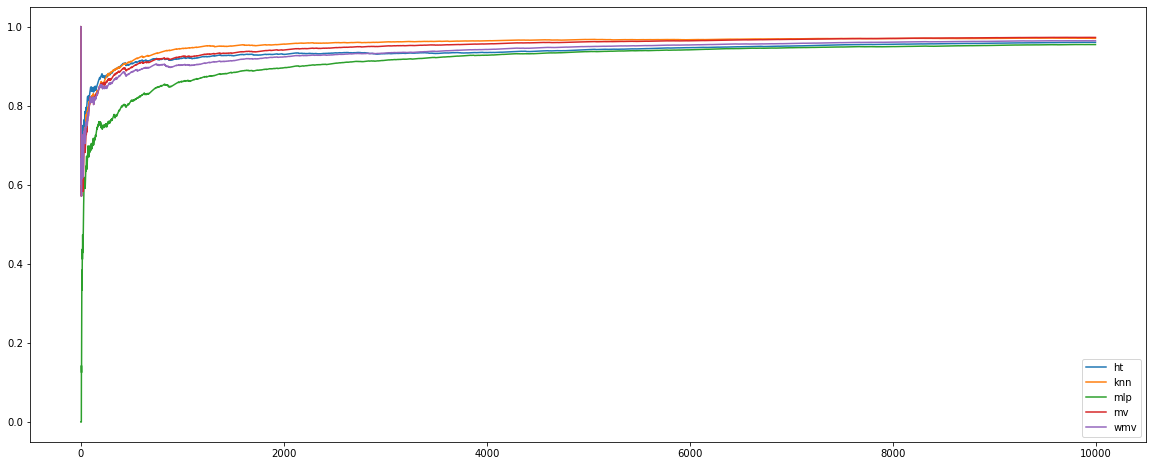

In [147]:
noise_0.plot.line(figsize=[20,8])

In [148]:
noise_10 = pd.DataFrame({
    'ht': df_HT10Noise['accuracy'],
    'knn': df_KNN10Noise['accuracy'],
    'mlp': df_MLP10Noise['accuracy'],
    'mv': df_MV10Noise['accuracy'],
    'wmv': df_WMV10Noise['accuracy']
})

<AxesSubplot:>

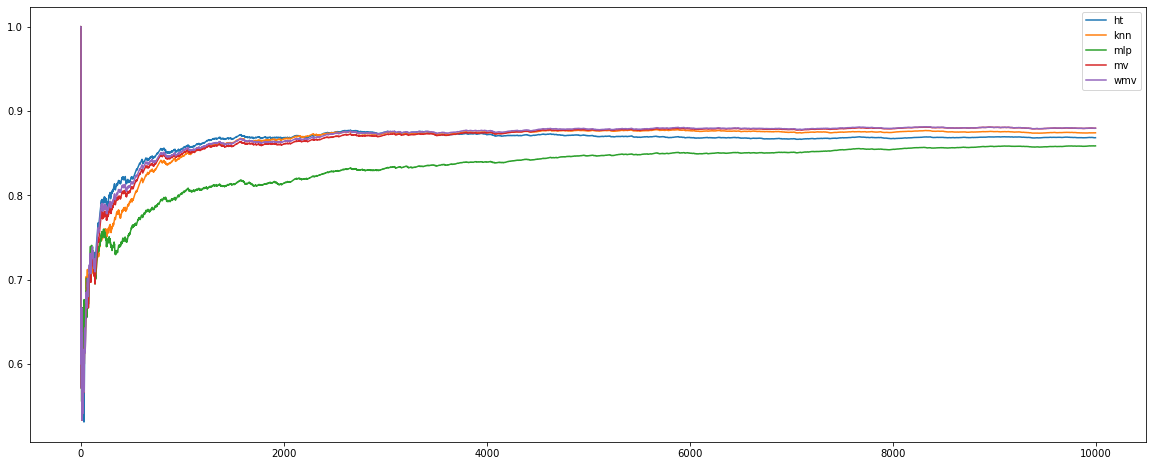

In [149]:
noise_10.plot.line(figsize=[20,8])

In [150]:
noise_70 = pd.DataFrame({
    'ht': df_HT70Noise['accuracy'],
    'knn': df_KNN70Noise['accuracy'],
    'mlp': df_MLP70Noise['accuracy'],
    'mv': df_MV70Noise['accuracy'],
    'wmv': df_WMV70Noise['accuracy']
})

<AxesSubplot:>

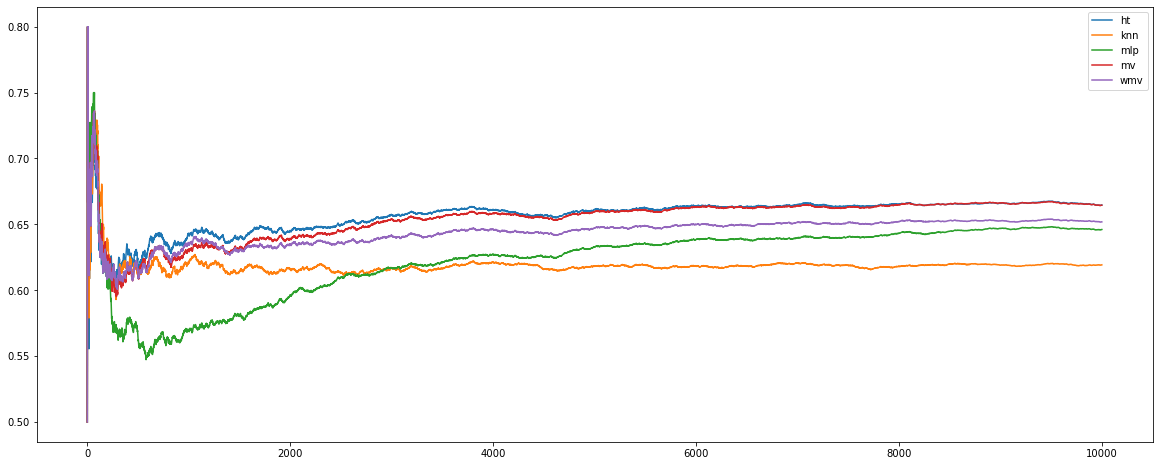

In [151]:
noise_70.plot.line(figsize=[20,8])

## Improving

### Gaussian noise MLP

In [261]:
stream = FileStream("./SEA Dataset 70.csv")
mlp = MLPClassifier(hidden_layer_sizes = (50, 50, 50, 50))
n_samples = 0
corrects = 0
df = pd.DataFrame(columns=['accuracy'])

start_with = 1
X, y = stream.next_sample(start_with)
mlp = mlp.partial_fit(X, y, classes=[0,1])
prepred = mlp.predict(X)
n_samples += start_with
corrects = (prepred == y).sum()

while stream.has_more_samples():
    X, y = stream.next_sample()
    pred = mlp.predict(X)
    if y[0] == pred[0]:
        corrects += 1
    mlp = mlp.partial_fit(X, y)
    n_samples += 1
    df = df.append(pd.DataFrame(np.array([[corrects/n_samples]]), columns=['accuracy']), ignore_index=True)
    # this is the same as all the other MLP scripts, excep that after each partial loop,
    # some gaussian noise is added to the sample, and the model is trained again with the noisy sample
    noisyX = X + np.random.rand(*X.shape)
    mlp = mlp.partial_fit(noisyX, y)
print("Accuracy: {}".format(corrects/n_samples))

Accuracy: 0.6413641364136413


In [285]:
tmp = pd.DataFrame({
    'mlp': df_MLP70Noise['accuracy'],
    'mlp with gaussian noise': df['accuracy'],
})

<AxesSubplot:>

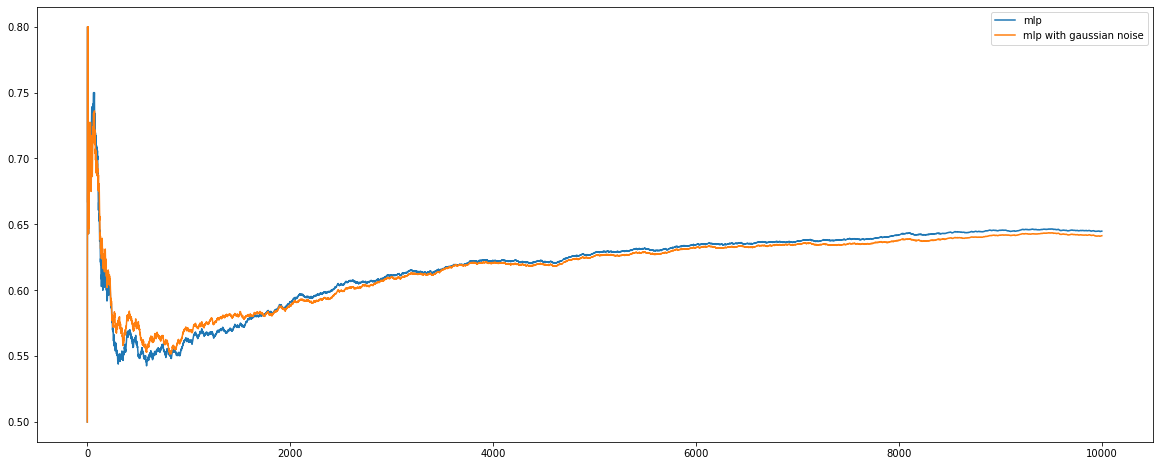

In [287]:
tmp.plot.line(figsize=(20,8))

reduces overfitting at the beginning (effective only with MLP)

## Time profiling

### HT 
#### No noise:
4.32 s ± 160 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
#### 10% noise:
4.15 s ± 72.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
#### 70% noise:
4.69 s ± 470 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

=============================================
### KNN
#### No noise:
7.08 s ± 649 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
#### 10% noise:
7.25 s ± 732 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
#### 70% noise:
6.88 s ± 368 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

=============================================
### MLP
#### No noise:
15.3 s ± 540 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
#### 10% noise:
15.7 s ± 744 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
#### 70% noise:
15.1 s ± 106 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

=============================================
### MV
#### No noise:
21.2 s ± 221 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
#### 10% noise:
21 s ± 215 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
#### 70% noise:
21.7 s ± 1.3 s per loop (mean ± std. dev. of 7 runs, 1 loop each)

=============================================
### WMV
#### No noise
21.8 s ± 1.11 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
#### 10% noise
21.1 s ± 259 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
#### 70% noise
21.4 s ± 1.08 s per loop (mean ± std. dev. of 7 runs, 1 loop each)

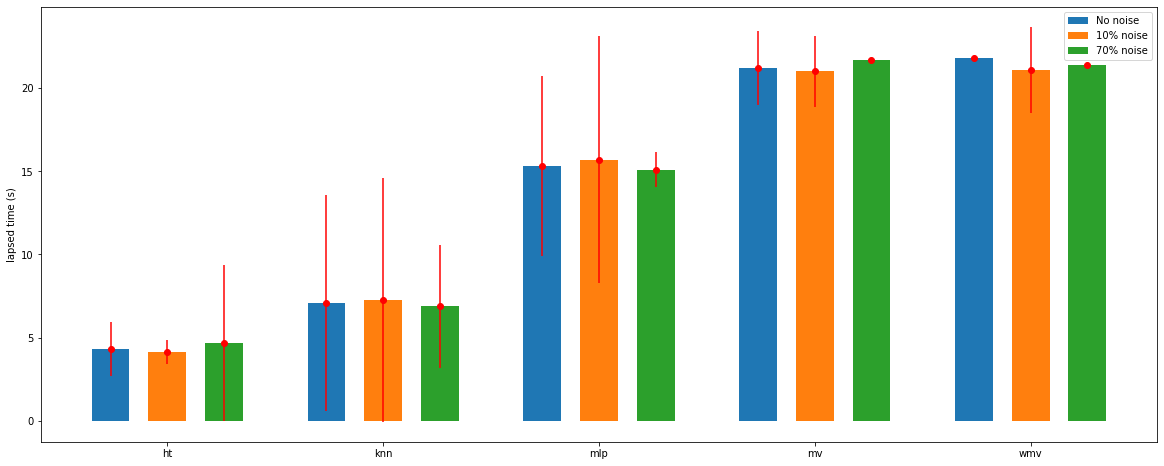

In [288]:
import matplotlib.pyplot as plt
b1 = [4.32,7.08,15.3,21.2,21.8]
b2 = [4.15,7.25,15.7,21,21.1]
b3 = [4.69,6.88,15.1,21.7,21.4]
c1 = [1.6,6.49,5.4,2.21,0.011]
c2 = [0.729,7.32,7.44,2.15,2.59]
c3 = [4.7,3.68,1.06,0.013,0.01]
labels = ['ht','knn','mlp','mv','wmv']
x = np.array([0,2,4,6,8])
width = 0.35
fig, ax = plt.subplots(figsize=(20,8))
rects1 = ax.bar(x - 3*width/2, b1, width, label='No noise')
rects2 = ax.bar(x , b2, width, label='10% noise')
rects3 = ax.bar(x + 3*width/2, b3, width, label='70% noise')
ax.set_ylabel('lapsed time (s)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
errs1 = ax.errorbar(x - 3*width/2, b1, c1, fmt="o", color="r")
errs2 = ax.errorbar(x, b2, c2, fmt="o", color="r")
errs3 = ax.errorbar(x + 3*width/2, b3, c3, fmt="o", color="r")

## Memory profiling

### HT 
#### No noise:
peak memory: 333.12 MiB, increment: 0.00 MiB
#### 10% noise:
peak memory: 333.12 MiB, increment: 0.00 MiB
#### 70% noise:
peak memory: 333.13 MiB, increment: 0.00 MiB

=============================================
### KNN
#### No noise:
peak memory: 333.14 MiB, increment: 0.00 MiB
#### 10% noise:
peak memory: 333.14 MiB, increment: 0.00 MiB
#### 70% noise:
peak memory: 333.15 MiB, increment: 0.00 MiB

=============================================
### MLP
#### No noise:
peak memory: 330.88 MiB, increment: 1.51 MiB
#### 10% noise:
peak memory: 330.07 MiB, increment: 1.24 MiB
#### 70% noise:
peak memory: 330.22 MiB, increment: 1.23 MiB

=============================================
### MV
#### No noise:
peak memory: 333.73 MiB, increment: 0.00 MiB
#### 10% noise:
peak memory: 330.72 MiB, increment: 1.48 MiB
#### 70% noise:
peak memory: 330.94 MiB, increment: 0.04 MiB

=============================================
### WMV
#### No noise
peak memory: 331.08 MiB, increment: 1.46 MiB
#### 10% noise
peak memory: 331.15 MiB, increment: 1.48 MiB
#### 70% noise
peak memory: 331.24 MiB, increment: 1.45 MiB

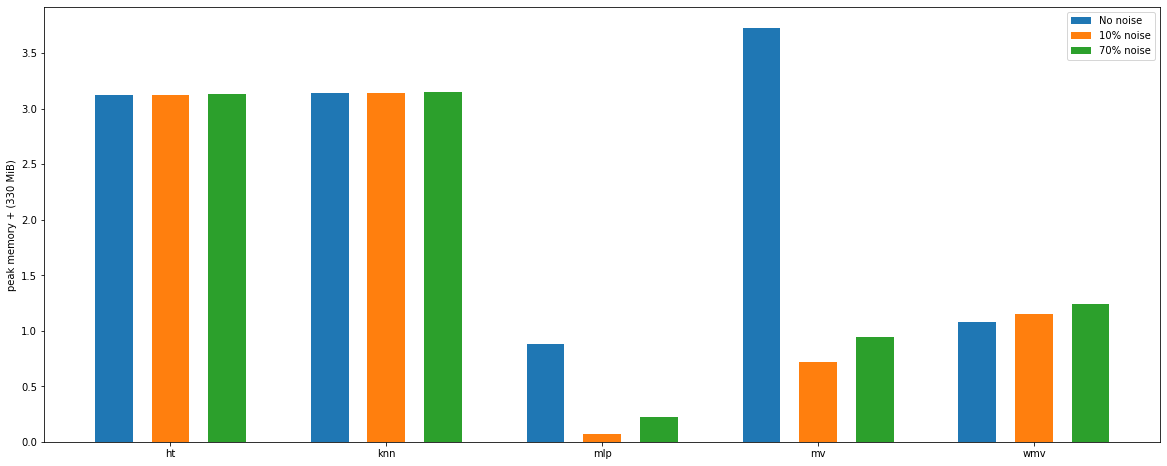

In [289]:
b1 = [3.12,3.14,0.88,3.73,1.08]
b2 = [3.12,3.14,0.07,0.72,1.15]
b3 = [3.13,3.15,0.22,0.94,1.24]
labels = ['ht','knn','mlp','mv','wmv']
x = np.array([0,2,4,6,8])
width = 0.35
fig, ax = plt.subplots(figsize=(20,8))
rects1 = ax.bar(x - 3*width/2, b1, width, label='No noise')
rects2 = ax.bar(x , b2, width, label='10% noise')
rects3 = ax.bar(x + 3*width/2, b3, width, label='70% noise')
ax.set_ylabel('peak memory + (330 MiB)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()